In [1]:
#number of dimensions used and steps when unrolling
input_dim = 6
input_steps = 2

hidden_layer = [50,10]

labels = ['curve_s','curve_m','curve_l']
classes = len(labels)

#percentage used for test data
test_rate = 0.1

In [10]:
import load_samples as ls
import math

data_train_x = []
data_train_y = []
data_test_x = []
data_test_y = []
i = 0

for label in labels:
    samples = ls.load_sample(labels = label)
    samples = ls.convert_to_input(samples, steps=input_steps)
    samples = ls.flatten(samples)
    
    low = int(test_rate*len(samples))
    data_train = samples[low:]
    data_test = samples[:low]
    
    data_train_x.extend(data_train)
    data_train_y.extend([i]*len(data_train))
    data_test_x.extend(data_test)
    data_test_y.extend([i]*len(data_test))
    
    i += 1
    

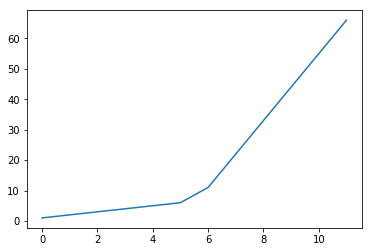

In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(data_train_x[0])
plt.show()

In [4]:
import tensorflow as tf
import numpy as np
tf.logging.set_verbosity(tf.logging.ERROR)


#x,y instead of input_fn
xtest = np.array(data_test_x)
ytest = np.array(data_test_y)
xtrain = np.array(data_train_x)
ytrain = np.array(data_train_y)

validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    xtest,
    ytest,
    every_n_steps=1)

feature_columns = [tf.contrib.layers.real_valued_column(
    "", 
    dimension=input_dim*input_steps)]
classifier = tf.contrib.learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=hidden_layer,
    n_classes=classes,
    #model_dir='/tmp/model',
    config=tf.contrib.learn.RunConfig(save_checkpoints_steps=1, save_checkpoints_secs=None)
    )

    

In [5]:
classifier.fit(x=xtrain, y=ytrain, steps = 5, monitors=[validation_monitor])

/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


DNNClassifier(params={'optimizer': None, 'hidden_units': [50, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=12, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None, 'activation_fn': <function relu at 0x7faa93112950>, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7faa92c81e48>, 'dropout': None, 'gradient_clip_norm': None})

In [6]:
accuracy = classifier.evaluate(x=xtest, y=ytest, steps=1)
print(accuracy["accuracy"])

/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


1.0


In [7]:
res = classifier.predict(x=np.array([xtrain[0]]), as_iterable=False)
print(res)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


[1]
